Media datelor zgomot: 58.0


Output()

         mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
mu     58.001  0.766    56.415     59.504      0.020    0.020    1570.0   
sigma   2.348  0.677     1.307      3.706      0.016    0.018    1883.0   

       ess_tail  r_hat  
mu       1493.0    1.0  
sigma    2166.0    1.0  


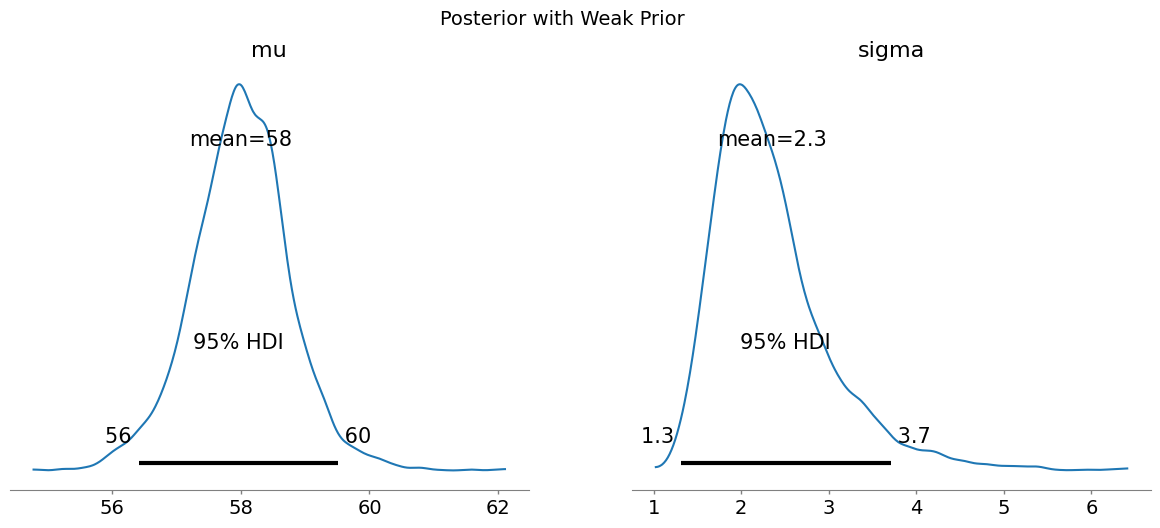


[Punctul (b)] 95% HDI μ: [56.415, 59.504] (mean=58.001)
[Punctul (b)] 95% HDI sigma: [1.307, 3.706] (mean=2.348)

[Punctul (c)] Estimari frecventiste:
Media esantion (x̄) = 58.000
Dev. standard esantion (s) = 2.000
Comparatie:
Bayesian μ mean (weak prior) = 58.001
Bayesian sigma mean (weak prior) = 2.348
Observatii: Priorul slab (sd=10) este foarte difuz, astfel μ posterior se aliniază cu media esantionului. Pentru sigma, posteriorul combină informația limitată (n=10) cu forma HalfNormal, ceea ce duce la o medie puțin diferită de s.


Output()

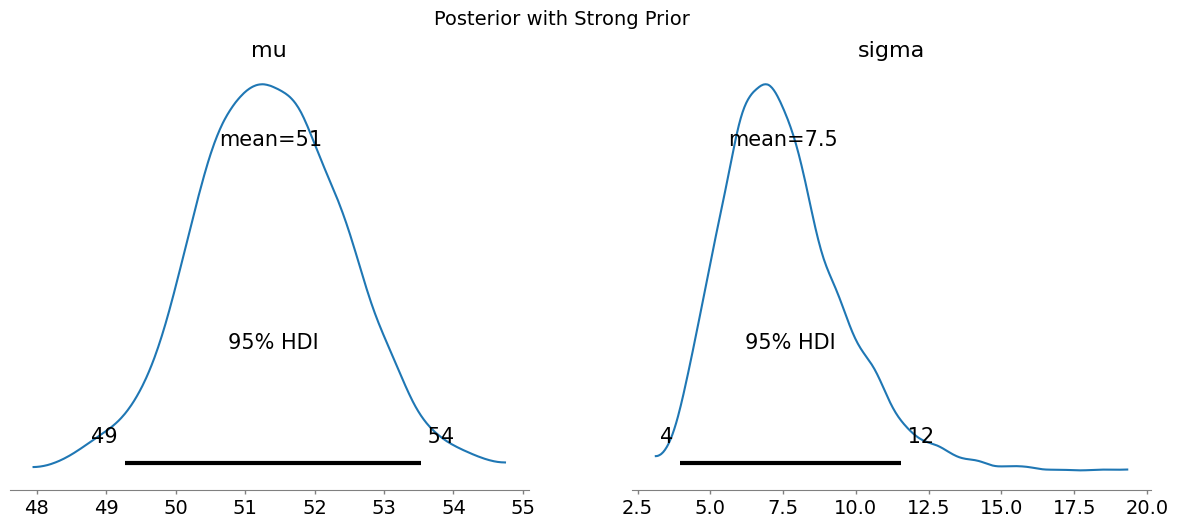


[Punctul (d)] Posterior cu prior puternic:
        mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
mu     51.37  1.082    49.263     53.540      0.026    0.017    1732.0   
sigma   7.50  2.064     3.962     11.534      0.048    0.038    1704.0   

       ess_tail  r_hat  
mu       2122.0    1.0  
sigma    2049.0    1.0  
95% HDI mu (strong prior): [49.263, 53.540] (mean=51.370)
95% HDI sigma (strong prior): [3.962, 11.534] (mean=7.500)
Efect: mu este tras spre 50 (valoarea centrului priorului) deoarece priorul are varianta mica(sd=1). Cu doar 10 observatii, likelihood-ul nu poate contrabalansa complet credinta puternica din prior. sigma ramane relativ similar deoarece priorul pe sigma nu s-a schimbat.
Frecventist: x̄=58.000, s=2.000 | Bayesian weak prior: μ=58.001, sigma=2.348 | Bayesian strong prior: μ=51.370, sigma=7.500
Concluzie: Priorul slab produce rezultate apropiate de estimarile clasice; priorul puternic induce shrinkage al lui μ spre valoarea asumata (50).


In [ ]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
import arviz as az

# Datele (nivel zgomot in dB)
noise = np.array([56, 60, 58, 55, 57, 59, 61, 56, 58, 60], dtype=float)

x = noise.mean()
print("Media datelor zgomot:", x)
# deviatia standard = 10.0
# varianta = 10.0 ^ 2

with pm.Model() as noise_model:
    mu = pm.Normal("mu", mu=x, sigma=10.0)
    sigma = pm.HalfNormal("sigma", sigma=10.0)
    # likelihood (observed data)
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=noise)
    # sample posterior
    trace_weak = pm.sample(2000, tune=2000, chains=2, cores=1, target_accept=0.9, random_seed=42)
    summary_weak = az.summary(trace_weak, var_names=["mu", "sigma"], hdi_prob=0.95)

print(summary_weak)
az.plot_posterior(trace_weak, var_names=["mu", "sigma"], hdi_prob=0.95)
plt.suptitle("Posterior with Weak Prior", fontsize=14)
plt.show()



# (b) 95% HDI pentru mu si sigma
mu_mean = float(trace_weak.posterior["mu"].mean())
sigma_mean = float(trace_weak.posterior["sigma"].mean())
mu_low = float(summary_weak.loc["mu", "hdi_2.5%"])
mu_high = float(summary_weak.loc["mu", "hdi_97.5%"])
sigma_low = float(summary_weak.loc["sigma", "hdi_2.5%"])
sigma_high = float(summary_weak.loc["sigma", "hdi_97.5%"])
print(f"\n[Punctul (b)] 95% HDI mu: [{mu_low:.3f}, {mu_high:.3f}] (mean={mu_mean:.3f})")
print(f"[Punctul (b)] 95% HDI sigma: [{sigma_low:.3f}, {sigma_high:.3f}] (mean={sigma_mean:.3f})")


# (c) Comparatie cu estimarile frecventiste
sample_mean = noise.mean()
sample_std = noise.std(ddof=1)
print("\n[Punctul (c)] Estimari frecventiste:")
print(f"Media esantion (x̄) = {sample_mean:.3f}")
print(f"Dev. standard esantion (s) = {sample_std:.3f}")
print("Comparatie:")
print(f"Bayesian mu mean (weak prior) = {mu_mean:.3f}")
print(f"Bayesian sigma mean (weak prior) = {sigma_mean:.3f}")
print(
    "Observatii: Priorul slab (sd=10) este foarte difuz, astfel mu posterior se aliniaza cu media esantionului. "
    "Pentru sigma, posteriorul combina informatia limitata (n=10) cu forma HalfNormal, ceea ce duce la o medie putin diferita de s."
)

# =============================
# (d) Efectul unui prior puternic:
with pm.Model() as strong_model:
    mu_strong = pm.Normal("mu", mu=50.0, sigma=1.0)
    sigma_strong = pm.HalfNormal("sigma", sigma=10.0)
    y_obs_strong = pm.Normal("y_obs", mu=mu_strong, sigma=sigma_strong, observed=noise)
    trace_strong = pm.sample(2000, tune=2000, target_accept=0.9, random_seed=99)
    summary_strong = az.summary(trace_strong, var_names=["mu", "sigma"], hdi_prob=0.95)





az.plot_posterior(trace_strong, var_names=["mu", "sigma"], hdi_prob=0.95)
plt.suptitle("Posterior with Strong Prior", fontsize=14)
plt.show()





mu_str_mean = float(trace_strong.posterior["mu"].mean())
sigma_str_mean = float(trace_strong.posterior["sigma"].mean())
mu_str_low = float(summary_strong.loc["mu", "hdi_2.5%"])
mu_str_high = float(summary_strong.loc["mu", "hdi_97.5%"])
sigma_str_low = float(summary_strong.loc["sigma", "hdi_2.5%"])
sigma_str_high = float(summary_strong.loc["sigma", "hdi_97.5%"])

print("\n[Punctul (d)] Posterior cu prior puternic:")
print(summary_strong)
print(
    f"95% HDI mu (strong prior): [{mu_str_low:.3f}, {mu_str_high:.3f}] (mean={mu_str_mean:.3f})"
)
print(
    f"95% HDI sigma (strong prior): [{sigma_str_low:.3f}, {sigma_str_high:.3f}] (mean={sigma_str_mean:.3f})"
)
print(
    "Efect: mu este tras spre 50 (valoarea centrului priorului) deoarece priorul are varianta mica(sd=1). "
    "Cu doar 10 observatii, likelihood-ul nu poate contrabalansa complet credinta puternica din prior. "
    "sigma ramane relativ similar deoarece priorul pe sigma nu s-a schimbat."
)

print(
    f"Frecventist: x̄={sample_mean:.3f}, s={sample_std:.3f} | Bayesian weak prior: mu={mu_mean:.3f}, sigma={sigma_mean:.3f} | "
    f"Bayesian strong prior: mu={mu_str_mean:.3f}, sigma={sigma_str_mean:.3f}"
)
print("Concluzie: Priorul slab produce rezultate apropiate de estimarile clasice; priorul puternic induce shrinkage al lui mu spre valoarea asumata (50).")
